In [86]:
import pandas as pd
import numpy as numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU, PReLU
from keras.utils import np_utils
from keras.callbacks import CSVLogger, ModelCheckpoint
import h5py
import os
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
from tensorflow.compat.v1 import ConfigProto, Session


# Configure GPU
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

config = ConfigProto()
config.gpu_options.allow_growth = True
set_session(Session(config=config))
# print(tf.config.list_physical_devices('GPU'))

with h5py.File(''.join(['bitcoin2015to2021_close.h5']), 'r') as hf:
    datas = hf['inputs'][()]
    labels = hf['outputs'][()]

output_file_name='bitcoin2015to2021_close_CNN_2_relu'

# Set Hyperparameters
step_size = datas.shape[1]
batch_size= 128
nb_features = datas.shape[2]
epochs = 100

# Split training validation
training_size = int(0.8 * datas.shape[0])
training_datas = datas[:training_size,:]
training_labels = labels[:training_size,:]
validation_datas = datas[training_size:,:]
validation_labels = labels[training_size:,:]

# Build model
# 2 layers
model = Sequential()
model.add(Conv1D(activation='relu', input_shape=(step_size, nb_features), strides=3, filters=16, kernel_size=32))
model.add(Dropout(0.5))
model.add(Conv1D(strides=3, filters=nb_features, kernel_size=28))

'''
# 3 Layers
model.add(Conv1D(activation='relu', input_shape=(step_size, nb_features), strides=3, filters=8, kernel_size=8))
#model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Conv1D(activation='relu', strides=2, filters=8, kernel_size=8))
#model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Conv1D( strides=2, filters=nb_features, kernel_size=8))
# 4 layers
model.add(Conv1D(activation='relu', input_shape=(step_size, nb_features), strides=2, filters=8, kernel_size=2))
#model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Conv1D(activation='relu', strides=2, filters=8, kernel_size=2))
#model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Conv1D(activation='relu', strides=2, filters=8, kernel_size=2))
#model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Conv1D( strides=2, filters=nb_features, kernel_size=2))
'''

model.compile(loss='mse', optimizer='adam')
model.fit(training_datas, training_labels,verbose=1, batch_size=batch_size,validation_data=(validation_datas,validation_labels), epochs = epochs, callbacks=[CSVLogger(output_file_name+'.csv', append=True),ModelCheckpoint('weights_CNN/'+output_file_name+'-{epoch:02d}-{val_loss:.5f}.hdf5', monitor='val_loss', verbose=1,mode='min')])


Epoch 1/100
 1/13 [=>............................] - ETA: 0s - loss: 0.0101
Epoch 00001: saving model to weights_CNN/bitcoin2015to2021_close_CNN_2_relu-01-0.00067.hdf5
13/13 [==============================] - 0s 12ms/step - loss: 0.0029 - val_loss: 6.6551e-04
Epoch 2/100
 1/13 [=>............................] - ETA: 0s - loss: 7.1267e-04
Epoch 00002: saving model to weights_CNN/bitcoin2015to2021_close_CNN_2_relu-02-0.00255.hdf5
13/13 [==============================] - 0s 7ms/step - loss: 7.7031e-04 - val_loss: 0.0025
Epoch 3/100
 1/13 [=>............................] - ETA: 0s - loss: 4.6244e-04
Epoch 00003: saving model to weights_CNN/bitcoin2015to2021_close_CNN_2_relu-03-0.00080.hdf5
13/13 [==============================] - 0s 7ms/step - loss: 5.2846e-04 - val_loss: 8.0284e-04
Epoch 4/100
 1/13 [=>............................] - ETA: 0s - loss: 4.5363e-04
Epoch 00004: saving model to weights_CNN/bitcoin2015to2021_close_CNN_2_relu-04-0.00018.hdf5
13/13 [==============================]

Epoch 32/100
 1/13 [=>............................] - ETA: 0s - loss: 1.5008e-04
Epoch 00032: saving model to weights_CNN/bitcoin2015to2021_close_CNN_2_relu-32-0.00066.hdf5
13/13 [==============================] - 0s 7ms/step - loss: 1.3685e-04 - val_loss: 6.5948e-04
Epoch 33/100
 1/13 [=>............................] - ETA: 0s - loss: 1.2697e-04
Epoch 00033: saving model to weights_CNN/bitcoin2015to2021_close_CNN_2_relu-33-0.00016.hdf5
13/13 [==============================] - 0s 7ms/step - loss: 1.3862e-04 - val_loss: 1.5893e-04
Epoch 34/100
 1/13 [=>............................] - ETA: 0s - loss: 1.1910e-04
Epoch 00034: saving model to weights_CNN/bitcoin2015to2021_close_CNN_2_relu-34-0.00024.hdf5
13/13 [==============================] - 0s 7ms/step - loss: 1.2742e-04 - val_loss: 2.3906e-04
Epoch 35/100
 1/13 [=>............................] - ETA: 0s - loss: 9.1873e-05
Epoch 00035: saving model to weights_CNN/bitcoin2015to2021_close_CNN_2_relu-35-0.00016.hdf5
13/13 [================

13/13 [==============================] - 0s 7ms/step - loss: 1.0242e-04 - val_loss: 2.2983e-04
Epoch 63/100
 1/13 [=>............................] - ETA: 0s - loss: 1.2566e-04
Epoch 00063: saving model to weights_CNN/bitcoin2015to2021_close_CNN_2_relu-63-0.00017.hdf5
13/13 [==============================] - 0s 7ms/step - loss: 1.0528e-04 - val_loss: 1.6706e-04
Epoch 64/100
 1/13 [=>............................] - ETA: 0s - loss: 8.7840e-05
Epoch 00064: saving model to weights_CNN/bitcoin2015to2021_close_CNN_2_relu-64-0.00024.hdf5
13/13 [==============================] - 0s 7ms/step - loss: 1.1342e-04 - val_loss: 2.4175e-04
Epoch 65/100
 1/13 [=>............................] - ETA: 0s - loss: 1.2276e-04
Epoch 00065: saving model to weights_CNN/bitcoin2015to2021_close_CNN_2_relu-65-0.00037.hdf5
13/13 [==============================] - 0s 7ms/step - loss: 1.0752e-04 - val_loss: 3.6605e-04
Epoch 66/100
 1/13 [=>............................] - ETA: 0s - loss: 1.0329e-04
Epoch 00066: saving 

 1/13 [=>............................] - ETA: 0s - loss: 8.6267e-05
Epoch 00093: saving model to weights_CNN/bitcoin2015to2021_close_CNN_2_relu-93-0.00018.hdf5
13/13 [==============================] - 0s 8ms/step - loss: 1.0143e-04 - val_loss: 1.8393e-04
Epoch 94/100
 1/13 [=>............................] - ETA: 0s - loss: 8.5967e-05
Epoch 00094: saving model to weights_CNN/bitcoin2015to2021_close_CNN_2_relu-94-0.00043.hdf5
13/13 [==============================] - 0s 7ms/step - loss: 9.7813e-05 - val_loss: 4.3025e-04
Epoch 95/100
 1/13 [=>............................] - ETA: 0s - loss: 1.1497e-04
Epoch 00095: saving model to weights_CNN/bitcoin2015to2021_close_CNN_2_relu-95-0.00017.hdf5
13/13 [==============================] - 0s 7ms/step - loss: 1.0167e-04 - val_loss: 1.7259e-04
Epoch 96/100
 1/13 [=>............................] - ETA: 0s - loss: 1.0462e-04
Epoch 00096: saving model to weights_CNN/bitcoin2015to2021_close_CNN_2_relu-96-0.00020.hdf5
13/13 [=============================

# Result Plotting

First, we need to reconstruct the model and load the trained_weights into the model.

In [87]:
from keras import applications
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.callbacks import CSVLogger
import tensorflow as tf
from imageio import imread
import numpy as np
import random
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU
from keras import backend as K
import keras
from keras.callbacks import CSVLogger, ModelCheckpoint
from tensorflow.compat.v1.keras.backend import set_session
from keras import optimizers
import h5py
from sklearn.preprocessing import MinMaxScaler
import os
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt


# Configure GPU
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

with h5py.File(''.join(['bitcoin2015to2021_close.h5']), 'r') as hf:
    datas = hf['inputs'][()]
    labels = hf['outputs'][()]
    input_times = hf['input_times'][()]
    output_times = hf['output_times'][()]
    original_inputs = hf['original_inputs'][()]
    original_outputs = hf['original_outputs'][()]
    original_datas = hf['original_datas'][()]

scaler=MinMaxScaler()
# Split training validation
training_size = int(0.8 * datas.shape[0])
training_datas = datas[:training_size,:,:]
training_labels = labels[:training_size,:,:]
validation_datas = datas[training_size:,:,:]
validation_labels = labels[training_size:,:,:]
validation_original_outputs = original_outputs[training_size:,:,:]
validation_original_inputs = original_inputs[training_size:,:,:]
validation_input_times = input_times[training_size:,:,:]
validation_output_times = output_times[training_size:,:,:]

ground_true = np.append(validation_original_inputs,validation_original_outputs, axis=1)
ground_true_times = np.append(validation_input_times,validation_output_times, axis=1)
step_size = datas.shape[1]
batch_size= 128
nb_features = datas.shape[2]

model = Sequential()

# 2 layers
model.add(Conv1D(activation='relu', input_shape=(step_size, nb_features), strides=3, filters=16, kernel_size=32))
# model.add(LeakyReLU())
model.add(Dropout(0.25))
model.add(Conv1D( strides=3, filters=nb_features, kernel_size=28))
model.load_weights('weights_CNN/bitcoin2015to2021_close_CNN_2_relu-99-0.00016.hdf5')
model.compile(loss='mse', optimizer='adam')

Then, we need to invert-scaled the predicted data, which ranges from [0,1] because of the MinMaxScaler used previously.

In [88]:
predicted = model.predict(validation_datas)
predicted_inverted = []

for i in range(original_datas.shape[1]):
    scaler.fit(original_datas[:,i].reshape(-1,1))
    predicted_inverted.append(scaler.inverse_transform(predicted[:,:,i]))
print(np.array(predicted_inverted).shape)
# Get only the close data
ground_true = ground_true[:,:,0].reshape(-1)
ground_true_times = ground_true_times.reshape(-1)
ground_true_times = pd.to_datetime(ground_true_times, unit='s')
# Since we are appending in the first dimension
predicted_inverted = np.array(predicted_inverted)[0,:,:].reshape(-1)
print(np.array(predicted_inverted).shape)
validation_output_times = pd.to_datetime(validation_output_times.reshape(-1), unit='s')

(1, 395, 16)
(6320,)


Both Dataframes for the ground true (actual price) and the predicted price of Bitcoin are set up. For visualization purpose, the plotted figure only shows the data from April 2020 thereafter.

In [89]:
ground_true_df = pd.DataFrame()
ground_true_df['times'] = ground_true_times
ground_true_df['value'] = ground_true
ground_true_df.shape

(107440, 2)

In [90]:
prediction_df = pd.DataFrame()
prediction_df['times'] = validation_output_times
prediction_df['value'] = predicted_inverted
prediction_df.shape

(6320, 2)

In [91]:
prediction_df.head()

,times,value
0,2020-04-04 16:50:00,6713.672852
1,2020-04-04 16:55:00,6715.625000
2,2020-04-04 17:00:00,6715.629883
3,2020-04-04 17:05:00,6708.966797
4,2020-04-04 17:10:00,6710.304688


Plot the figure with pyplot. Since the predicted price is on a 16 minute basis, not linking all of them up would allow us to view the result easier. As a result, here the predicted data is plotted as red dot, as “ro” in the third line indicates. The blue line in the below graph represents the ground true (actual data), whereas the red dots represent the predicted Bitcoin price.

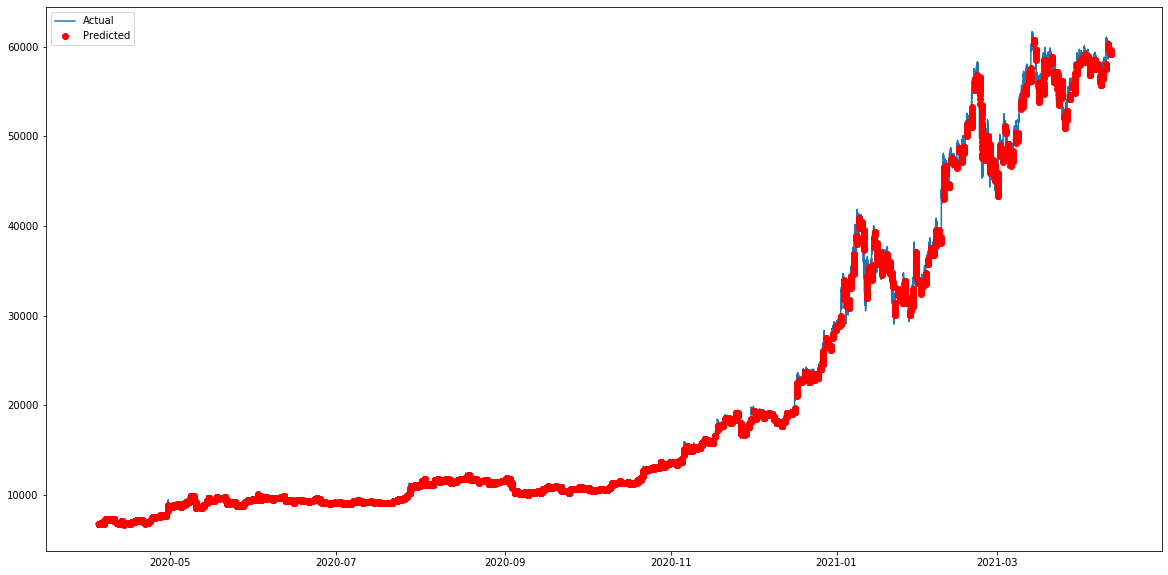

In [92]:
prediction_df = prediction_df.loc[(prediction_df["times"].dt.year >= 2020 )&(prediction_df["times"].dt.month >= 1 ),: ]
ground_true_df = ground_true_df.loc[(ground_true_df["times"].dt.year >= 2020 )&(ground_true_df["times"].dt.month >= 1 ),:]

plt.figure(figsize=(20,10))
plt.plot(ground_true_df.times,ground_true_df.value, label = 'Actual')
plt.plot(prediction_df.times,prediction_df.value,'ro', label='Predicted')
plt.legend(loc='upper left')
plt.savefig('result/bitcoin2015to2021_close_CNN_2_relu_result.png')
plt.show()

In [93]:
from sklearn.metrics import mean_squared_error
mean_squared_error(validation_original_outputs[:,:,0].reshape(-1),predicted_inverted)

595087.949744598